In [1]:
import numpy as np
import pandas as pd
import wrangle_anomaly as w

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
traffic = w.wrangle_web_traffic()

opening file from local directory


In [3]:
traffic

,path,user_id,cohort_id,ip,cohort_name,start_date,end_date,program_id,lesson
datetime,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,java-ii
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,java-ii
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,slides
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0,javascript-i
...,...,...,...,...,...,...,...,...,...
2021-04-21 16:41:51,jquery/personal-site,64,28.0,71.150.217.33,Staff,2014-02-04,2014-02-04,2.0,jquery
2021-04-21 16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,Staff,2014-02-04,2014-02-04,2.0,jquery
2021-04-21 16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,Staff,2014-02-04,2014-02-04,2.0,jquery


# 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [4]:
traffic.program_id.value_counts(dropna=False)

2.0    713365
3.0    103411
NaN     52893
1.0     30548
4.0         5
Name: program_id, dtype: int64

In [5]:
traffic.reset_index().groupby(['lesson', 'program_id']).\
    datetime.nunique().sort_values(ascending=False).head(50)

lesson                program_id
javascript-i          2.0           108425
html-css              2.0            77920
mysql                 2.0            75352
jquery                2.0            55871
spring                2.0            52438
java-iii              2.0            51626
java-ii               2.0            50487
java-i                2.0            37567
                      2.0            35622
javascript-ii         2.0            35483
appendix              2.0            30071
toc                   2.0            17300
search                2.0            15141
examples              2.0            13580
                      3.0             8228
sql                   3.0             7447
classification        3.0             6837
slides                2.0             6437
3-sql                 3.0             6099
fundamentals          3.0             5673
python                3.0             5559
content               1.0             5240
1-fundamentals       

In [6]:
traffic[traffic.program_id == 4].reset_index().groupby(['lesson', 'program_id']).\
    datetime.nunique().sort_values(ascending=False).head(50)

lesson   program_id
content  4.0           3
         4.0           1
Name: datetime, dtype: int64

In [7]:
traffic[traffic.program_id.isna() == True].reset_index().groupby(['lesson']).\
    datetime.nunique().sort_values(ascending=False).head(50)

lesson
javascript-i                        4819
                                    4439
html-css                            3373
spring                              3088
mysql                               2860
jquery                              2532
java-ii                             2153
java-iii                            2144
search                              1981
java-i                              1503
javascript-ii                       1310
appendix                            1256
toc                                  697
examples                             677
capstone                             464
Intro_to_Regression_Module           396
slides                               375
Regression_Python                    354
3.0-mysql-overview                   309
4.6.3_introduction_to_pandas         283
6_Exercises                          276
4.2_data_types_and_variables         263
8_Exercises                          220
2.01.00_Descriptive_Stats            215
git      

### The most commonly accessed lesson for each program were:
- Program 1 - 'content' which I don't think is a lesson, 'javascript-i' was the next highest
- Program 2 - 'javascript-i'
- Program 3 - 'sql'
- Program 4 - 'content'

# 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [76]:
lesson_df1 = pd.DataFrame(traffic[(traffic.cohort_name != 'Staff')].\
                          reset_index().groupby('lesson').\
     cohort_name.value_counts()).rename(columns={'cohort_name':'count'}).\
    reset_index()

In [77]:
lesson_df1.head()

,lesson,cohort_name,count
0,,Darden,2980
1,,Voyageurs,2101
2,,Fortuna,2038
3,,Bayes,1967
4,,Teddy,1828


In [74]:
lesson_df2 = pd.DataFrame(traffic[(traffic.cohort_name != 'Staff')]\
                          .reset_index().groupby('lesson').\
     cohort_name.value_counts(normalize=True)).rename(columns={'cohort_name':'proba'}).\
    reset_index()

In [75]:
lesson_df2.head()

,lesson,cohort_name,proba
0,,Darden,0.075416
1,,Voyageurs,0.053171
2,,Fortuna,0.051577
3,,Bayes,0.049780
4,,Teddy,0.046262


In [12]:
# merge the two data frames create above into a single one:
lesson_df = pd.concat([lesson_df1, lesson_df2.proba], axis=1)
lesson_df.head()

,lesson,cohort_name,count,proba
0,,Darden,2980,0.075416
1,,Voyageurs,2101,0.053171
2,,Fortuna,2038,0.051577
3,,Bayes,1967,0.049780
4,,Teddy,1828,0.046262


In [13]:
lesson_df[(lesson_df['count'] >= 10)].\
    sort_values('proba', ascending=False).head(50)

,lesson,cohort_name,count,proba
1732,working-with-time-series-data,Darden,14,1.000000
716,dataframes,Florence,11,1.000000
463,acquire,Darden,16,1.000000
808,florence-python-assessment.html,Florence,16,1.000000
231,3-vocabulary.md,Bayes,12,1.000000
929,individual-project,Easley,80,0.987654
1620,study-session-with-ryan,Ceres,23,0.884615
723,distributed-ml,Darden,568,0.861912
1333,nlp,Darden,1106,0.822917
915,index.html,Lassen,877,0.787253


# 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [14]:
traffic.head(2)

,path,user_id,cohort_id,ip,cohort_name,start_date,end_date,program_id,lesson
datetime,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,java-ii


#### To get accesses during active status, we will need to find all instances where datetimes is between start_date and end_date for each user

In [15]:
active_df = traffic[(traffic.start_date < traffic.index)
                    & (traffic.end_date > traffic.index)
                    & (traffic.cohort_name != 'Staff')]

In [16]:
active_df.groupby('user_id').lesson.count().sort_values().head(50)

user_id
918     1
879     1
940     1
619     1
832     3
278     4
539     5
956     6
812     7
388     8
679    11
572    12
941    12
697    13
889    16
487    17
968    17
963    18
340    18
961    20
49     25
64     25
772    26
24     26
41     28
976    29
972    34
973    35
529    36
959    41
967    41
981    42
371    42
971    44
964    45
741    47
960    48
56     52
543    53
46     54
965    55
978    55
962    58
57     62
858    63
36     65
45     65
250    67
975    67
969    71
Name: lesson, dtype: int64

In [17]:
active_df.groupby('user_id').lesson.count().sort_values().head(50).index

Int64Index([918, 879, 940, 619, 832, 278, 539, 956, 812, 388, 679, 572, 941,
            697, 889, 487, 968, 963, 340, 961,  49,  64, 772,  24,  41, 976,
            972, 973, 529, 959, 967, 981, 371, 971, 964, 741, 960,  56, 543,
             46, 965, 978, 962,  57, 858,  36,  45, 250, 975, 969],
           dtype='int64', name='user_id')

In [18]:
low_activity_users = active_df.groupby('user_id').\
    lesson.count().sort_values().head(50).index

In [19]:
low_activity_df = pd.DataFrame(active_df[active_df.user_id.isin(low_activity_users)])

In [20]:
low_activity_user_df = pd.DataFrame(active_df[active_df.user_id.isin(low_activity_users)]\
    [['user_id','ip','cohort_name','start_date', 'end_date']].\
    groupby('user_id').value_counts()).rename(columns={0:'counts'}).reset_index()

In [21]:
low_activity_user_df

,user_id,ip,cohort_name,start_date,end_date,counts
0,24,97.105.19.61,Sequoia,2017-09-27,2018-02-15,26
1,36,173.174.159.45,Sequoia,2017-09-27,2018-02-15,34
2,36,97.105.19.61,Sequoia,2017-09-27,2018-02-15,25
3,36,72.181.117.226,Sequoia,2017-09-27,2018-02-15,3
4,36,64.134.159.125,Sequoia,2017-09-27,2018-02-15,2
...,...,...,...,...,...,...
79,978,73.85.64.161,Oberon,2021-04-12,2021-10-01,42
80,978,172.58.14.166,Oberon,2021-04-12,2021-10-01,10
81,978,172.58.12.225,Oberon,2021-04-12,2021-10-01,2
82,978,172.58.14.191,Oberon,2021-04-12,2021-10-01,1


In [22]:
low_activity_df.head()

,path,user_id,cohort_id,ip,cohort_name,start_date,end_date,program_id,lesson
datetime,,,,,,,,,
2018-01-26 11:24:17,appendix,24,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2.0,appendix
2018-01-26 11:24:29,appendix/capstone-workbook,24,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2.0,appendix
2018-01-26 12:33:51,/,36,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2.0,
2018-01-26 13:51:13,mysql,36,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2.0,mysql
2018-01-26 13:51:15,mysql/users,36,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2.0,mysql


In [23]:
low_activity_df.groupby('cohort_name').user_id.nunique()

cohort_name
Andromeda     1
Bayes         1
Ceres         1
Darden        2
Europa        3
Fortuna       1
Ganymede      2
Hyperion      1
Jupiter       2
Kalypso       1
Marco         2
Neptune       4
Oberon       17
Sequoia       7
Teddy         1
Voyageurs     2
Yosemite      1
Zion          1
Name: user_id, dtype: int64

#### There are 49 users that accessed the content less than 70 times while active. The most users with low access came from cohorts Oberon and Sequoia

# 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [33]:
no_cohort = traffic[traffic.cohort_id.isna() == True]

In [51]:
no_cohort_ip = pd.DataFrame(no_cohort[no_cohort.lesson != ''].\
             groupby('lesson').ip.value_counts()).\
    rename(columns={'ip':'count'}).reset_index()

In [59]:
no_cohort_ip.sort_values('count', ascending=False)

,lesson,ip,count
2864,search,97.105.19.58,1036
2496,javascript-i,70.117.16.60,434
1788,Intro_to_Regression_Module,97.105.19.58,306
2497,javascript-i,70.94.165.107,287
1872,Regression_Python,97.105.19.58,280
...,...,...,...
1837,Pipeline_Demo,71.42.140.139,1
1836,Pipeline_Demo,70.120.3.141,1
1835,Pipeline_Demo,67.11.62.220,1
1834,Pipeline_Demo,24.26.242.9,1


### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [25]:
traffic.lesson.value_counts().head(20)

javascript-i      118723
html-css           84935
mysql              82320
jquery             60869
spring             58603
java-iii           56733
java-ii            55107
                   50313
java-i             41158
javascript-ii      38796
appendix           36867
search             19524
toc                18297
examples           14855
classification     11476
fundamentals       11162
1-fundamentals     10159
content             9308
sql                 9045
slides              7700
Name: lesson, dtype: int64

In [26]:
traffic[traffic.lesson == 'javascript-i'].groupby('program_id').\
    resample('D').user_id.nunique().reset_index()

,program_id,datetime,user_id
0,1.0,2018-01-26,2
1,1.0,2018-01-27,0
2,1.0,2018-01-28,1
3,1.0,2018-01-29,3
4,1.0,2018-01-30,3
...,...,...,...
1976,3.0,2019-12-10,0
1977,3.0,2019-12-11,0
1978,3.0,2019-12-12,0
1979,3.0,2019-12-13,0


In [27]:
js_1 = traffic[traffic.lesson == 'javascript-i'].groupby('program_id').\
    resample('D').user_id.nunique().reset_index()

In [28]:
js_1 = traffic[(traffic.lesson == 'classification') 
               &(traffic.program_id == 2)
              &(traffic.index > '2019-09')].groupby('program_id').\
    resample('D').user_id.nunique().reset_index()

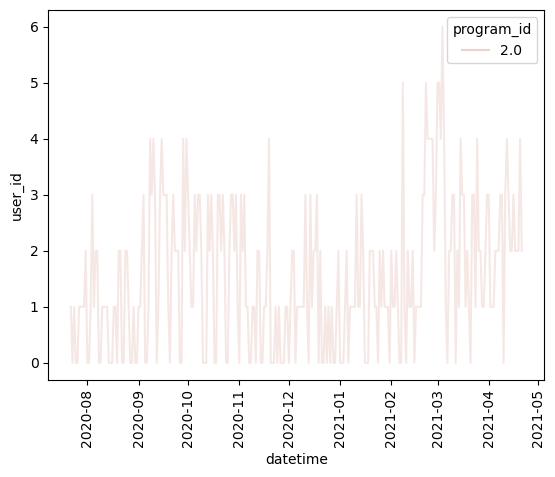

In [29]:
sns.lineplot(data=js_1, x='datetime', y='user_id', hue='program_id', alpha=0.5)
plt.xticks(rotation=90)
plt.show()

- The last access to Javascript lessons for program 1 was on 2020-01-15.
- program 2 appears to be able to access all content
- The last access to Javascript lessons for program 3 was on 2019-12-15.

# 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [30]:
after_grad = traffic[(traffic.index > traffic.end_date) & (traffic.cohort_name != 'Staff')]

In [31]:
after_grad.head(2)

,path,user_id,cohort_id,ip,cohort_name,start_date,end_date,program_id,lesson
datetime,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,java-ii


In [32]:
# after_grad.groupby('program_id','lesson').index.nunique()

ValueError: No axis named lesson for object type DataFrame

# 7. Which lessons are least accessed?